# Análise Exploratória (EDA)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go


In [27]:
df_sus = pd.read_csv('../data/opendatasus/opendatasus.csv', encoding='latin1', sep=';', low_memory=False)
df_estacoes = pd.read_csv('../data/estacoes_monitorar/estacoes.csv', encoding='latin1', sep=';', low_memory=False)
df_medidas_jan_mar = pd.read_csv('../data/medidas_monitorar/medidas_jan_mar.csv', encoding='latin1', sep=';', low_memory=False)
df_medidas_abr_jun = pd.read_csv('../data/medidas_monitorar/medidas_abr_jun.csv', encoding='latin1', sep=';', low_memory=False)
df_medidas_jul_nov = pd.read_csv('../data/medidas_monitorar/medidas_jul_nov.csv', encoding='latin1', sep=';', low_memory=False)

In [28]:
# Useful columns 
df_sus = df_sus[['DT_SIN_PRI', 'CS_SEXO', 'DT_NASC', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'CO_MUN_RES', 
                'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO', 'DT_EVOLUCA']]

df_estacoes = df_estacoes[['ï»¿CÃ³digo IBGE do MunicÃ­pio', 'Nome do MunicÃ­pio', 'Estado', 'ID da EstaÃ§Ã£o', 'Nome da EstaÃ§Ã£o', 'Latitude', 'Longitude']]

df_medidas = pd.concat([df_medidas_jan_mar,df_medidas_abr_jun, df_medidas_jul_nov])

df_medidas = df_medidas[['Nome do Município', 'Estado', 'Nome da Estação', 'Item_monitorado', 'Sigla', 'Concentracao', 'iqar']]

In [29]:
# Renaming columns datasus
df_sus.columns = df_sus.columns.str.lower()


In [30]:
# Renaming columns df_estacoes
new_names = ['codigo_mun', 'nome_mun', 'uf', 'id_estacao', 'nome_estacao', 'latitude', 'longitude']
dict_names = {}

for i, j in zip(df_estacoes.columns, new_names):
    dict_names[i] = j

df_estacoes.rename(columns=dict_names, inplace=True)

In [31]:
# Renaming column df_medidas
new_names = ['nome_mun', 'uf', 'nome_estacao', 'item_monitorado', 'sigla', 'concentracao', 'iqar']
dict_names = {}

for i, j in zip(df_medidas.columns, new_names):
    dict_names[i] = j

df_medidas.rename(columns=dict_names, inplace=True)

In [32]:
df_sus.head()

,dt_sin_pri,cs_sexo,dt_nasc,cs_raca,cs_escol_n,sg_uf,id_mn_resi,co_mun_res,classi_fin,criterio,evolucao,dt_evoluca
0,2019-12-29,F,1967-12-06,NaN,NaN,SP,CATANDUVA,351110.0,4.0,1.0,1.0,2020-01-04
1,2019-12-29,F,2000-12-13,2.0,2.0,RS,SAO JOSE DOS AUSENTES,431862.0,4.0,1.0,1.0,2020-04-05
2,2019-12-30,M,2019-05-17,9.0,5.0,SP,SAO PAULO,355030.0,1.0,1.0,1.0,2020-01-06
3,2019-12-30,M,2017-08-22,2.0,5.0,PR,FOZ DO IGUACU,410830.0,2.0,1.0,1.0,2020-01-02
4,2019-12-29,F,2019-07-22,1.0,5.0,PR,FOZ DO IGUACU,410830.0,2.0,1.0,1.0,2020-01-05


### DFS:

* df_sus: Dados do OpenDataSUS apenas com as colunas que vamos utilizar para a análise
    - Colunas:
        - Data dos primeiros sintomas (dt_sin_pri)
        - Sexo (Masculino ou Femino) (cs_sexo)
            - 1: Masculino
            - 2: Feminino
            - 3: Ignorado
        - Data de Nascimento (dt_nasc)
        - Raca (cs_raca)
            - 1: Branca
            - 2: Preta
            - 3: Amarela
            - 4: Parda
            - 5: Indígena
            - 9: Ignorado 
        - Nivel de escolaridade (cs_escol_n)
            - 0: Sem Escolaridade/Analfabeto
            - 1: Fundamental 1º ciclo (1ª a 5ª série)
            - 2: Fundamental 2º ciclo (6ª a 9ª série)
            - 3: Médio (1º ao 3º ano)
            - 4: Superior
            - 5: Não se aplica
            - 9: Ignorado
        - UF de moradia (sg_uf)
        - Nome do município de residência (id_mn_resi)
        - ID IBGE do município (co_mun_res)
        - Classificação final do caso (classi_fin)
            - 1: SRAG por Influenza
            - 2: SRAG por outro vírus resporatório
            - 3: SRAG por outro agente etiológico
            - 4: SRAG não especificado
            - 5: SRAG por covid-19
        - Criterio adotado para evolução do caso (criterio)
            - 1: Laboratorial
            - 2: Clínico Epidemiológico
            - 3: Clínico
            - 4: Clínico imagem
        - Evolução do caso, se deu alta ou óbito (evolucao)
            - 1: Cura
            - 2: Óbito
            - 3: Óbito por outras causas
            - 9: Ignorado
        - Data da evolucao (dt_evolucao)

* df_medidas: medidas do MonitorAr

* df_estacoes: dados sobre as estacoes
    - Código do munícipio de acordo com IBGE (codigo_mun)
    - Nome do município (nome_mun)
    - Estado de localização (uf)
    - ID da estação (id_estacao)
    - Nome da estação (nome_estacao)
    - Latitude e longitude da localizacação (latitude e longitude)

In [33]:
# Veryfing null/na columns
sus_null_columns = df_sus.isna().sum()
sus_null_columns


dt_sin_pri         0
cs_sexo            0
dt_nasc         2139
cs_raca        43310
cs_escol_n    359611
sg_uf            113
id_mn_resi       113
co_mun_res       113
classi_fin     32862
criterio       55277
evolucao       76522
dt_evoluca    152891
dtype: int64

In [34]:
medidas_null_columns  = df_medidas.isnull().sum()
medidas_null_columns

nome_mun                 0
uf                       0
nome_estacao             0
item_monitorado          0
sigla                    0
concentracao             0
iqar               1045240
dtype: int64

In [35]:
estacoes_null_columns = df_estacoes.isnull().sum()
estacoes_null_columns

codigo_mun      0
nome_mun        0
uf              0
id_estacao      0
nome_estacao    0
latitude        0
longitude       0
dtype: int64

In [36]:
df_sus['dt_sin_pri'] = pd.to_datetime(df_sus['dt_sin_pri'])
df_sus['dt_nasc'] = pd.to_datetime(df_sus['dt_nasc'])

In [37]:
df_sus['idade'] = (df_sus['dt_sin_pri'] - df_sus['dt_nasc']).dt.days // 365

In [38]:
df_sus['idade'].isna().sum()

np.int64(2139)

In [39]:
df_sus.dropna(subset=['idade'], inplace=True)

In [40]:
df_sus['idade'].isna().sum()

np.int64(0)

In [41]:
df_sus['cs_sexo'].dropna()

0          F
1          F
2          M
3          M
4          F
          ..
1206915    F
1206916    M
1206917    M
1206918    M
1206919    F
Name: cs_sexo, Length: 1204781, dtype: object

In [42]:
df_sus['cs_sexo'].isnull().sum()

np.int64(0)

In [ ]:
def faixa_etaria(idade):
    '''
        Função que recebe a idade e de acordo com isso, fornece em qual faixa etária o indivíduo se encaixa:
            Criança (0 -13 anos)
            Adolescente (13 - 17 anos)
            Adulto (18 - 64 anos)
            Idosos ( >= 65 anos)
    '''
    if idade >= 0 and idade < 13:
        return'crianca'
    elif idade >= 13 and idade < 18:
        return 'adolescente'
    elif idade >= 18 and idade < 65:
        return 'adulto'
    else:
        return 'idoso'

In [ ]:
# Criando a coluna faixa etária para analisar
df_sus['faixa_etaria'] = df_sus['idade'].apply(faixa_etaria)

In [ ]:
# Verificando se há valores nulos
df_sus['classi_fin'].isnull().sum()

np.int64(32789)

In [ ]:
# Dropando valores nulos da classificação final
df_sus.dropna(subset=['classi_fin'], inplace=True)

In [ ]:
# Transformando a classificação final do tipo string para inteiro
df_sus['classi_fin'] = df_sus['classi_fin'].astype(int)

In [48]:
# Filter only rows with classi_fin > 0
filtered_df = df_sus[df_sus['classi_fin'] > 0]

# Create the key by combining faixa_etaria and sexo
filtered_df['key'] = filtered_df['faixa_etaria'] + filtered_df['cs_sexo'].map({'M': 'masculino', 'F': 'feminino'})

# Count occurrences of each key
final_dict = filtered_df['key'].value_counts().to_dict()

In [49]:
final_dict

{'adultomasculino': 334365,
 'adultofeminino': 258905,
 'idosomasculino': 254525,
 'idosofeminino': 240841,
 'criancamasculino': 41159,
 'criancafeminino': 32446,
 'adolescentefeminino': 5239,
 'adolescentemasculino': 4227}

In [50]:

# Extrair faixas etárias únicas (ordenadas)
faixas_etarias = sorted(list(set([k.split('feminino')[0].split('masculino')[0] for k in final_dict.keys()])))

# Inicializar arrays para homens e mulheres
men_bins = np.zeros(len(faixas_etarias))
women_bins = np.zeros(len(faixas_etarias))

# Preencher os arrays
for i, faixa in enumerate(faixas_etarias):
    men_bins[i] = final_dict.get(faixa + 'masculino', 0)
    women_bins[i] = -final_dict.get(faixa + 'feminino', 0)  # Negativo para mulheres

# Layout do gráfico
layout = go.Layout(
    yaxis=go.layout.YAxis(title='Faixa Etária'),
    xaxis=go.layout.XAxis(
        range=[-max(men_bins)*1.1, max(men_bins)*1.1],  # Ajuste automático
        tickvals=[-1000, -700, -300, 0, 300, 700, 1000],  # Personalize conforme seus dados
        ticktext=['1000', '700', '300', '0', '300', '700', '1000'],
        title='Número de Casos'
    ),
    barmode='overlay',
    bargap=0.1,
    title='Pirâmide Etária de Casos (SUS)'
)

# Dados para o gráfico
data = [
    go.Bar(
        y=faixas_etarias,
        x=men_bins,
        orientation='h',
        name='Masculino',
        hoverinfo='x',
        marker=dict(color='powderblue')
    ),
    go.Bar(
        y=faixas_etarias,
        x=women_bins,
        orientation='h',
        name='Feminino',
        text=-1 * women_bins.astype('int'),  # Mostrar valores absolutos
        hoverinfo='text',
        marker=dict(color='seagreen')
    )
]

# Mostrar o gráfico
fig = go.Figure(data=data, layout=layout)
fig.show()

In [62]:
for i, faixa in enumerate(faixas_etarias):
    men_bins[i] = final_dict.get(faixa + 'masculino', 0)
    women_bins[i] = final_dict.get(faixa + 'feminino', 0)  # Negativo para mulheres

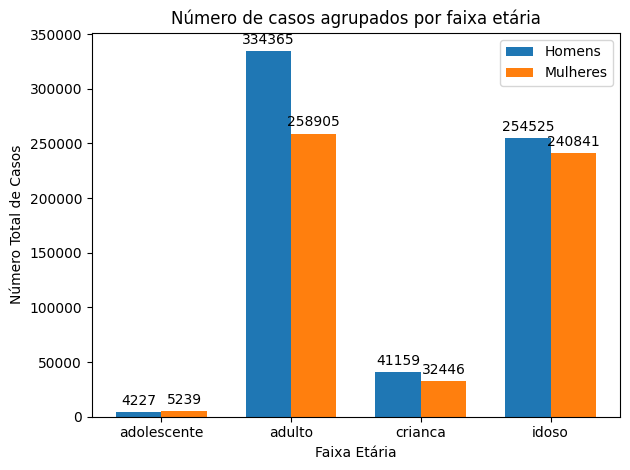

In [65]:
labels = sorted(list(set([k.split('feminino')[0].split('masculino')[0] for k in final_dict.keys()])))
x = np.arange(len(men_bins))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_bins, width, label='Homens')
rects2 = ax.bar(x + width/2, women_bins, width, label='Mulheres')

ax.set_ylabel('Número Total de Casos')
ax.set_xlabel('Faixa Etária')
ax.set_title('Número de casos agrupados por faixa etária')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

In [67]:
df_sus['sg_uf'].unique()

array(['SP', 'RS', 'PR', 'GO', 'PE', 'SC', 'RJ', 'TO', 'MG', 'DF', 'AM',
       'ES', 'CE', 'BA', 'SE', 'MS', 'PA', 'AC', 'MT', 'PI', 'PB', 'RO',
       'RN', 'RR', nan, 'MA', 'AL', 'AP'], dtype=object)

In [68]:
def juntando_numero_casos_por_uf(df):
    result_dict = {}

    for _, row in df.iterrows():
        key = row['sg_uf']

        result_dict[key] = result_dict.get(key, 0) + 1
    
    return result_dict

In [71]:
# Exclui linhas com uf null
df_sus.dropna(subset=['sg_uf'], inplace=True)

In [72]:
final_dict = juntando_numero_casos_por_uf(df_sus)

In [73]:
final_dict

{'SP': 352813,
 'RS': 56275,
 'PR': 72466,
 'GO': 34026,
 'PE': 59444,
 'SC': 35102,
 'RJ': 118859,
 'TO': 6740,
 'MG': 110187,
 'DF': 24706,
 'AM': 27546,
 'ES': 12509,
 'CE': 43328,
 'BA': 42880,
 'SE': 10300,
 'MS': 18539,
 'PA': 33102,
 'AC': 3202,
 'MT': 27797,
 'PI': 14116,
 'PB': 18481,
 'RO': 7811,
 'RN': 10859,
 'RR': 2033,
 'MA': 14280,
 'AL': 11775,
 'AP': 2706}